- Calling X_train, y_train, X_valid, y_valid, X_test, y_test from dataframe after preprocessing

In [ ]:
import pickle
with open("Hourly Dataframe Preprocessed.pkl", 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_valid = data['X_valid']
y_valid = data['y_valid']
X_test = data['X_test']
y_test = data['y_test']

print("DataFrames have been loaded successfully.")

## Tuning Hyperparams

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# import optuna
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from catboost import CatBoostRegressor

# def objective(trial):
#     """
#     Optuna objective: tối ưu siêu tham số cho CatBoostRegressor (MultiOutput).
#     """
#     param = {
#             "iterations": trial.suggest_int("iterations", 200, 800),
#             "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
#             "depth": trial.suggest_int("depth", 4, 10),
#             "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0, log=True),
#             "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
#             "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0, log=True),
#             "border_count": trial.suggest_int("border_count", 32, 255),
#             "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise"]),
#             "random_seed": 42,
#             "thread_count": -1
#         }

#     model = CatBoostRegressor(**param, verbose=0)  # Tắt log của CatBoost

#     multi_model = MultiOutputRegressor(model)
#     multi_model.fit(X_train, y_train)

#     y_pred = multi_model.predict(X_valid)

#     r2 = r2_score(y_valid, y_pred, multioutput='uniform_average')

#     return r2

# # Tạo Optuna study.
# study = optuna.create_study(direction="maximize",
#                             pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=30))

# print("Bắt đầu quá trình tối ưu hóa siêu tham số CatBoostRegressor với Optuna...")
# study.optimize(objective, n_trials=100, n_jobs=1)

# # In kết quả tốt nhất tìm được.
# print("\n------------------------------------------------")
# print("Kết quả tối ưu hóa hoàn tất.")
# print("Trial tốt nhất:")
# print(f"  Giá trị R2 tốt nhất trên tập validation: {study.best_value:.4f}")
# print("  Các siêu tham số tốt nhất: ")
# for key, value in study.best_params.items():
#     print(f"    {key}: {value}")
# print("------------------------------------------------")

d:\PythonCode\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-11 15:20:43,066] A new study created in memory with name: no-name-3a49f7a8-5d87-425a-8d00-5488f09cd205


Bắt đầu quá trình tối ưu hóa siêu tham số CatBoostRegressor với Optuna...


[I 2025-11-11 15:21:04,220] Trial 0 finished with value: 0.7730973672880053 and parameters: {'iterations': 342, 'learning_rate': 0.025157389059184708, 'depth': 5, 'l2_leaf_reg': 0.001666152400088525, 'bagging_temperature': 0.5043474592604531, 'random_strength': 0.3907479905874232, 'border_count': 129, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.7730973672880053.
[I 2025-11-11 15:22:17,363] Trial 1 finished with value: 0.7708087055032935 and parameters: {'iterations': 641, 'learning_rate': 0.005247702281400044, 'depth': 8, 'l2_leaf_reg': 0.0018048545158953898, 'bagging_temperature': 0.32020496335088466, 'random_strength': 0.21313215846572725, 'border_count': 97, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.7730973672880053.
[I 2025-11-11 15:22:28,829] Trial 2 finished with value: 0.7765920197551307 and parameters: {'iterations': 429, 'learning_rate': 0.011079688509144635, 'depth': 5, 'l2_leaf_reg': 0.526871489757351, 'bagging_temperature': 0.55859057


------------------------------------------------
Kết quả tối ưu hóa hoàn tất.
Trial tốt nhất:
  Giá trị R2 tốt nhất trên tập validation: 0.7817
  Các siêu tham số tốt nhất: 
    iterations: 721
    learning_rate: 0.008915870888940228
    depth: 4
    l2_leaf_reg: 2.1183365546121045
    bagging_temperature: 0.3601761997658992
    random_strength: 0.08245117433026397
    border_count: 78
    grow_policy: SymmetricTree
------------------------------------------------


## Test Model
- Calling best model hyper params from file joblib which is found by the previous Optuna cell.

In [ ]:
from joblib import load
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load best model từ file best_daily_model.joblib
best_model = load('Best Hourly Model Hyperparams.joblib')

# Dự đoán trên tập test
y_pred = best_model.predict(X_test)

# Tính toán các chỉ số đánh giá cho từng label
labels = y_test.columns  # Lấy tên các label
metrics = {}

for i, label in enumerate(labels):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    metrics[label] = {"R2": r2, "RMSE": rmse, "MAE": mae}

# In kết quả cho từng label
print("\nĐánh giá trên từng label:")
for label, metric in metrics.items():
    print(f"\nLabel: {label}")
    print(f"  R²: {metric['R2']:.4f}")
    print(f"  RMSE: {metric['RMSE']:.4f}")
    print(f"  MAE: {metric['MAE']:.4f}")

# Tính toán các chỉ số đánh giá macro
macro_r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
macro_rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))
macro_mae = mean_absolute_error(y_test, y_pred)

# In kết quả macro
print("\nĐánh giá macro:")
print(f"  Macro R²: {macro_r2:.4f}")
print(f"  Macro RMSE: {macro_rmse:.4f}")
print(f"  Macro MAE: {macro_mae:.4f}")


Đánh giá trên từng label:

Label: target_temp_t+1
  R²: 0.9265
  RMSE: 1.2933
  MAE: 1.0103

Label: target_temp_t+2
  R²: 0.8535
  RMSE: 1.8247
  MAE: 1.4332

Label: target_temp_t+3
  R²: 0.8213
  RMSE: 2.0141
  MAE: 1.6146

Label: target_temp_t+4
  R²: 0.8083
  RMSE: 2.0834
  MAE: 1.6761

Label: target_temp_t+5
  R²: 0.8028
  RMSE: 2.1142
  MAE: 1.7030

Đánh giá macro:
  Macro R²: 0.8425
  Macro RMSE: 1.8905
  Macro MAE: 1.4875


In [ ]:
# In ra nhiệt độ dự đoán và thực tế cho từng ngày trong 5 ngày
horizons = [1,2,3,4,5]
for h in horizons:
    print(f"\nNgày {h}:")
    print(f"  Nhiệt độ thực tế: {y_test[f'target_temp_t+{h}'].values[:5]}")
    print(f"  Nhiệt độ dự đoán: {y_pred[:, horizons.index(h)][:5]}")

# In các metrics của từng ngày
print("\nMetrics cho từng ngày:")
for label, metric in metrics.items():
    print(f"\nLabel: {label}")
    print(f"  R²: {metric['R2']:.4f}")
    print(f"  RMSE: {metric['RMSE']:.4f}")
    print(f"  MAE: {metric['MAE']:.4f}")

# In macro metrics
print("\nMacro Metrics:")
print(f"  Macro R²: {macro_r2:.4f}")
print(f"  Macro RMSE: {macro_rmse:.4f}")
print(f"  Macro MAE: {macro_mae:.4f}")


Ngày 1:
  Nhiệt độ thực tế: [30.65833333 30.21666667 31.1375     26.04166667 24.0875    ]
  Nhiệt độ dự đoán: [31.92360827 29.11190089 28.9143609  29.10367457 25.05992007]

Ngày 2:
  Nhiệt độ thực tế: [30.21666667 31.1375     26.04166667 24.0875     25.10416667]
  Nhiệt độ dự đoán: [29.68094616 28.42413658 28.01698848 28.24510746 24.98457515]

Ngày 3:
  Nhiệt độ thực tế: [31.1375     26.04166667 24.0875     25.10416667 28.175     ]
  Nhiệt độ dự đoán: [28.944122   27.98150356 27.89516267 27.86702063 26.21239106]

Ngày 4:
  Nhiệt độ thực tế: [26.04166667 24.0875     25.10416667 28.175      26.53333333]
  Nhiệt độ dự đoán: [28.4240749  27.6087147  27.76272168 27.46379573 26.82534827]

Ngày 5:
  Nhiệt độ thực tế: [24.0875     25.10416667 28.175      26.53333333 26.05      ]
  Nhiệt độ dự đoán: [28.33854639 27.53292897 27.69655644 27.3424284  27.09375096]

Metrics cho từng ngày:

Label: target_temp_t+1
  R²: 0.9265
  RMSE: 1.2933
  MAE: 1.0103

Label: target_temp_t+2
  R²: 0.8535
  RMSE: 

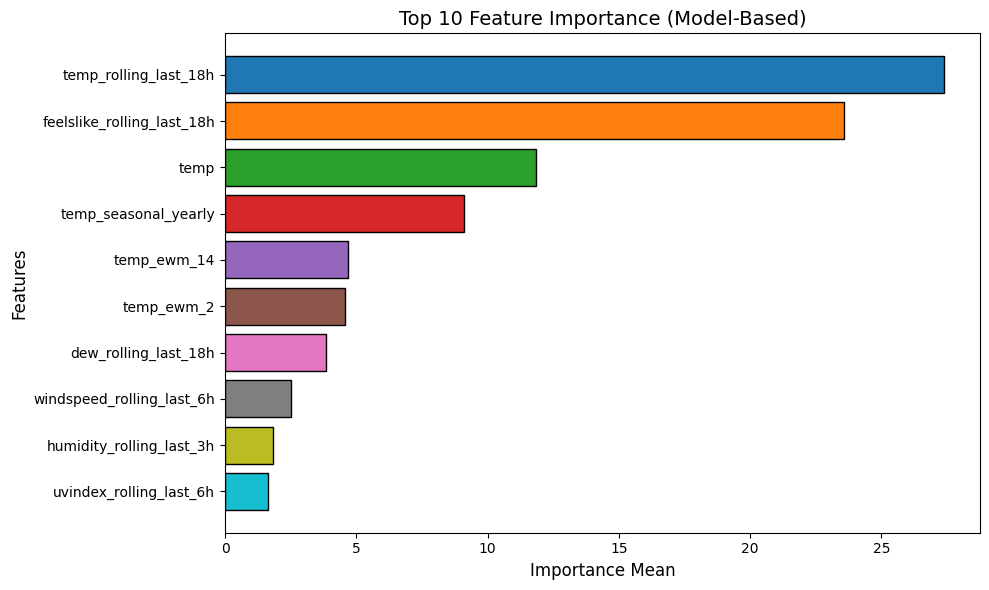

In [52]:
import matplotlib.pyplot as plt

# Lấy tên các feature từ X_train
feature_names = X_train.columns

# Tính toán feature importance từ mô hình đã huấn luyện
feature_importances = best_model.estimators_[0].feature_importances_

# Tạo DataFrame để sắp xếp và chọn top 10 feature
top_10_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': feature_importances
}).sort_values(by='Importance_Mean', ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(top_10_features)))  # Mỗi feature có màu khác nhau
plt.barh(top_10_features['Feature'], top_10_features['Importance_Mean'], color=colors, edgecolor='black')
plt.xlabel('Importance Mean', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance (Model-Based)', fontsize=14)
plt.gca().invert_yaxis()  # Đảo ngược trục y để feature quan trọng nhất ở trên cùng
plt.tight_layout()
plt.show()